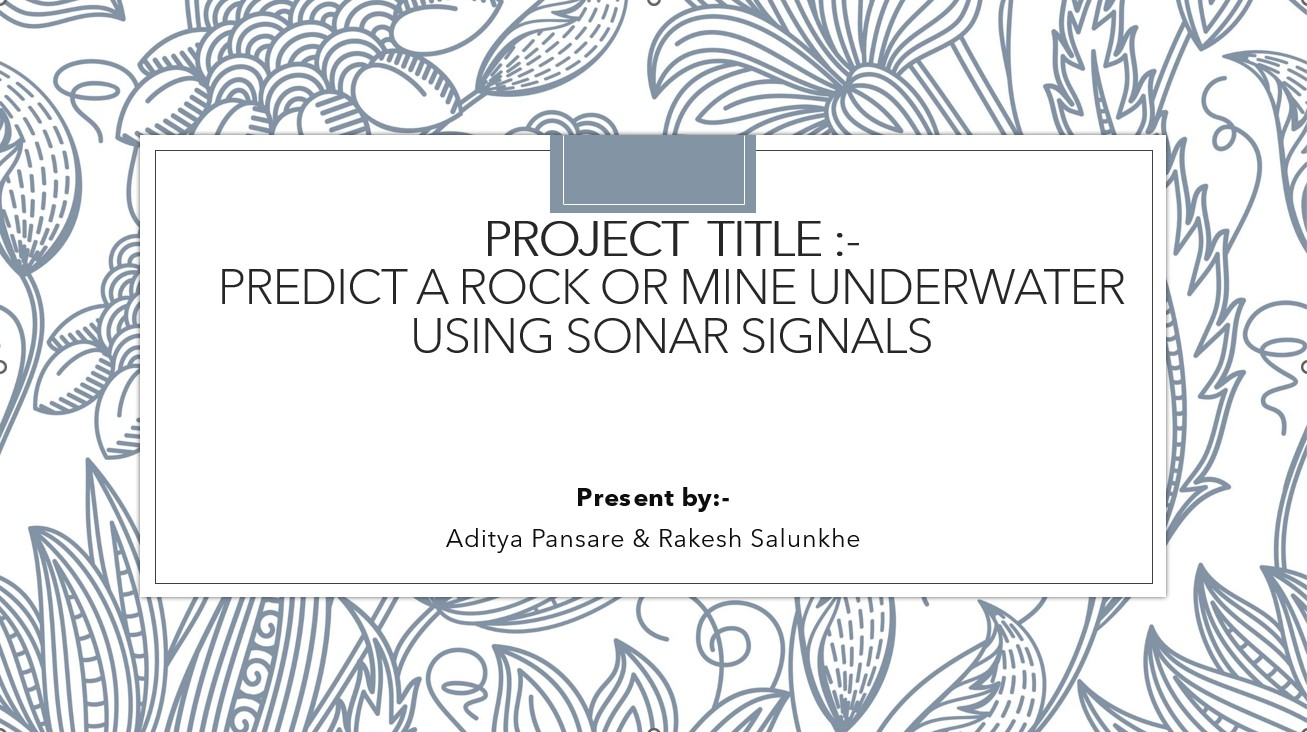

# Project Background

   Consider there is a war going, A submarines wants to go in enemy territory so it should be aware of the mines beneath it. But similarly there are rocks as well, so how could it predict wehther the object is a mine or a rock? Submarine uses SONAR (Sound Navigation and Ranging)which sends sound signals. This received Signal is then processed and detected whther the object is mine or a rock.


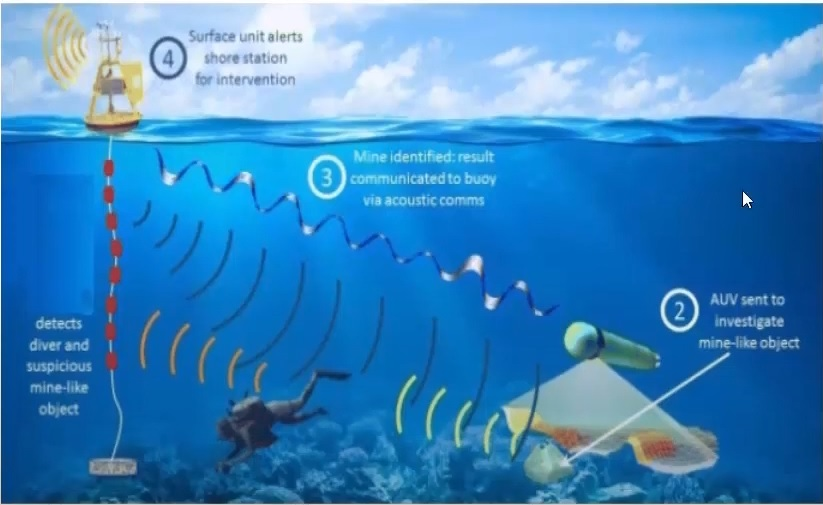

# Project Methodology

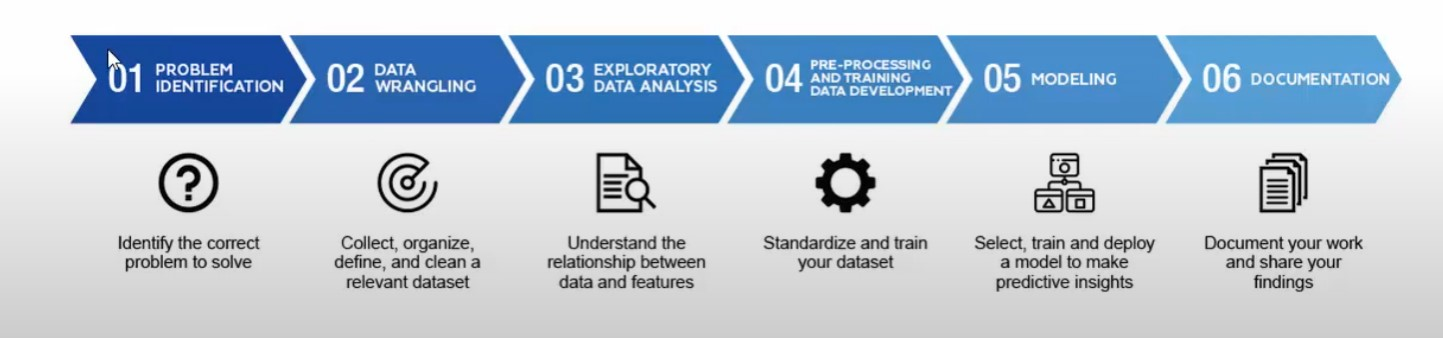

In [1]:
# import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Data Wrangling

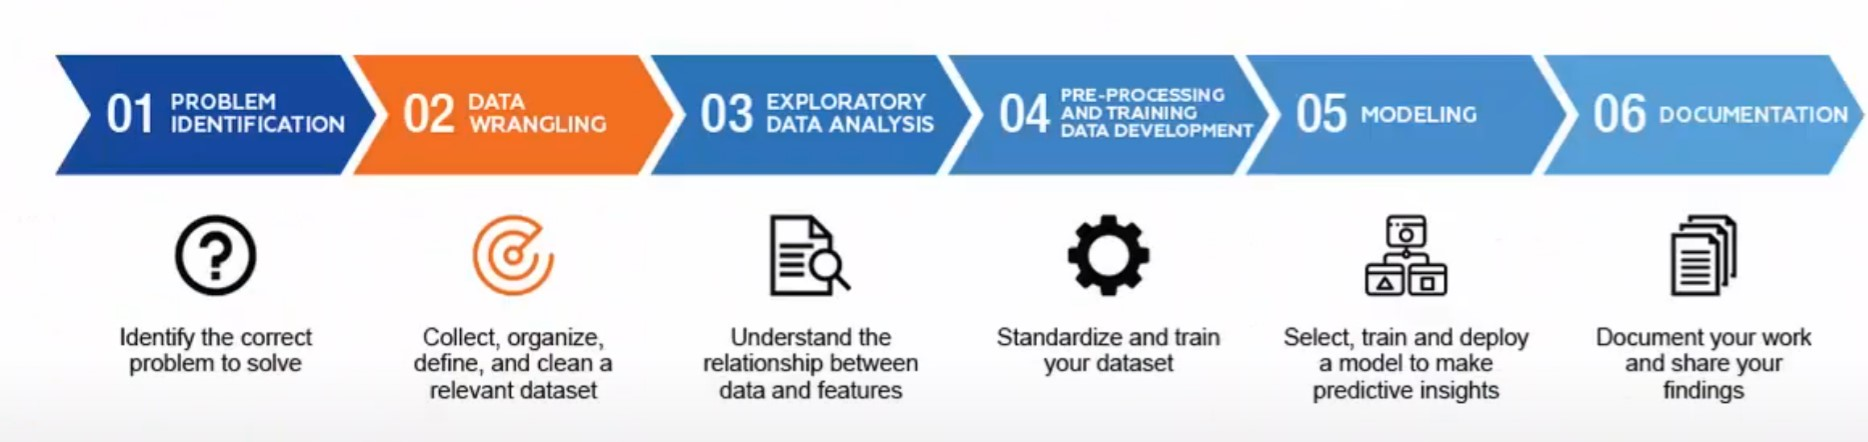

In [7]:
sonar_data = pd.read_csv(r"D:\datasets\my data\Copy of sonar data.csv", header=None)

In [8]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [9]:
sonar_data.shape

(208, 61)

In [10]:
sonar_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [11]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

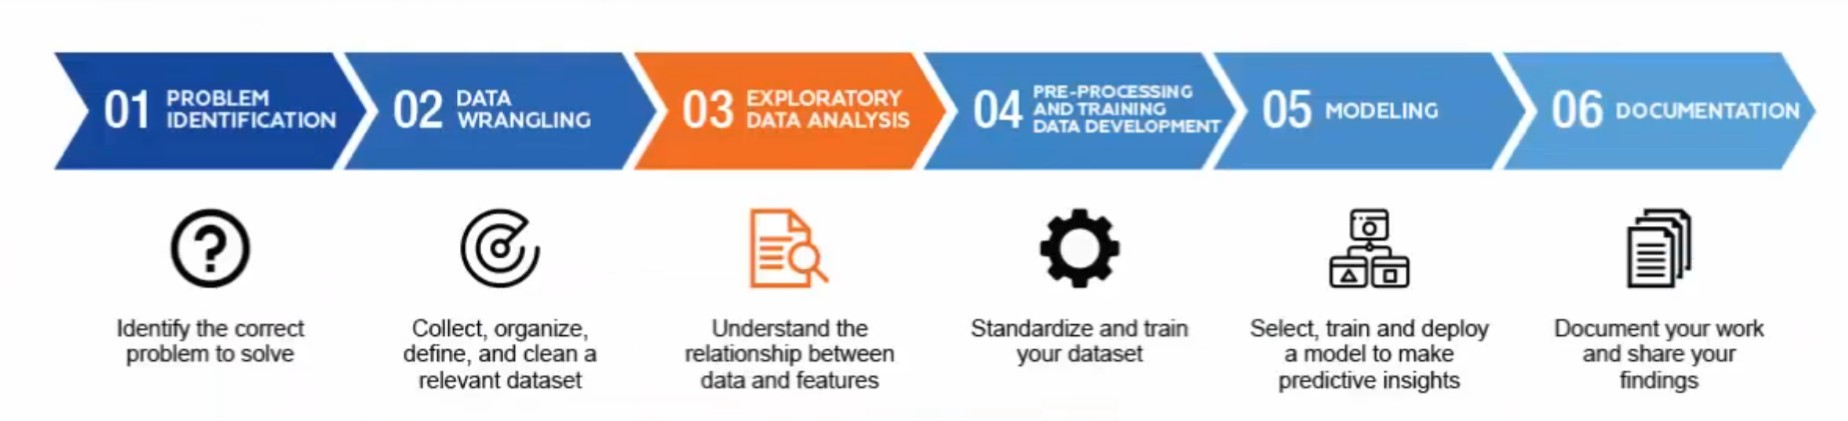

In [12]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M -> mines 

R -> Rocks

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'R')])

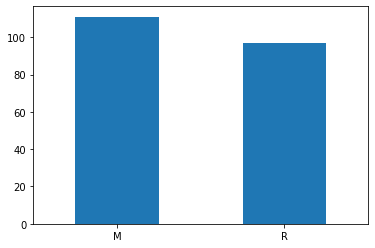

In [13]:
sonar_data[60].value_counts().plot(kind="bar")
plt.xticks(rotation="horizontal")
 

In [14]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


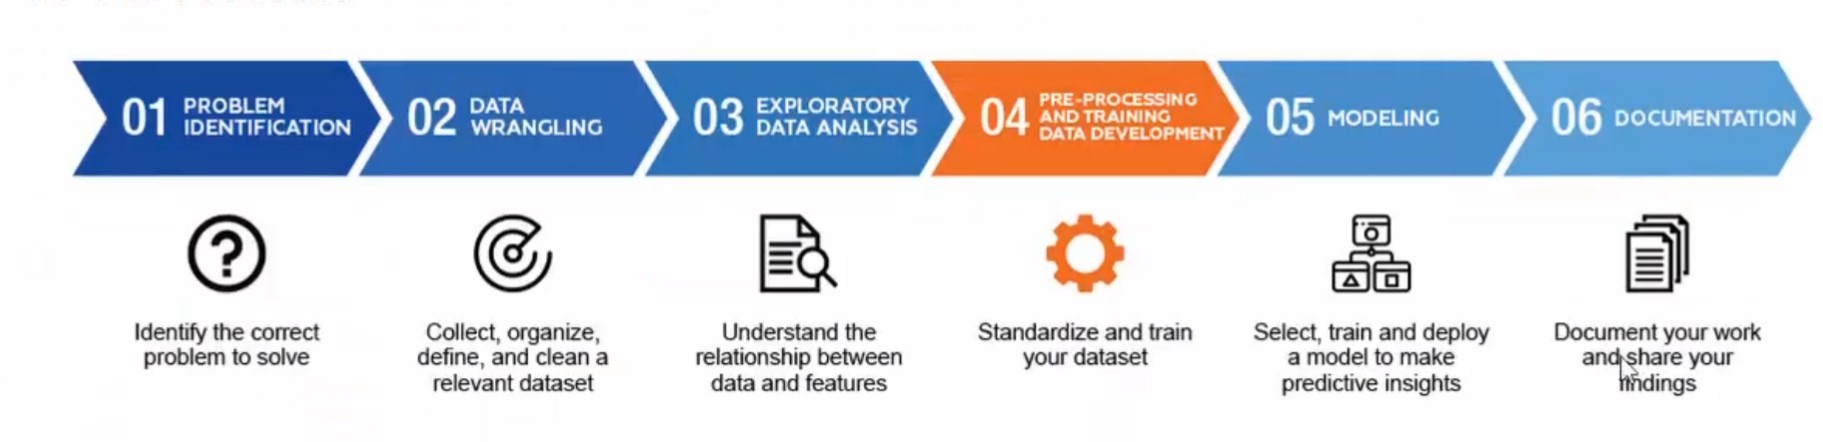

In [15]:
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.1,stratify=Y)

In [18]:
print(X.shape,X_test.shape,X_train.shape,Y_train.shape,Y_test.shape)

(208, 60) (21, 60) (187, 60) (187,) (21,)


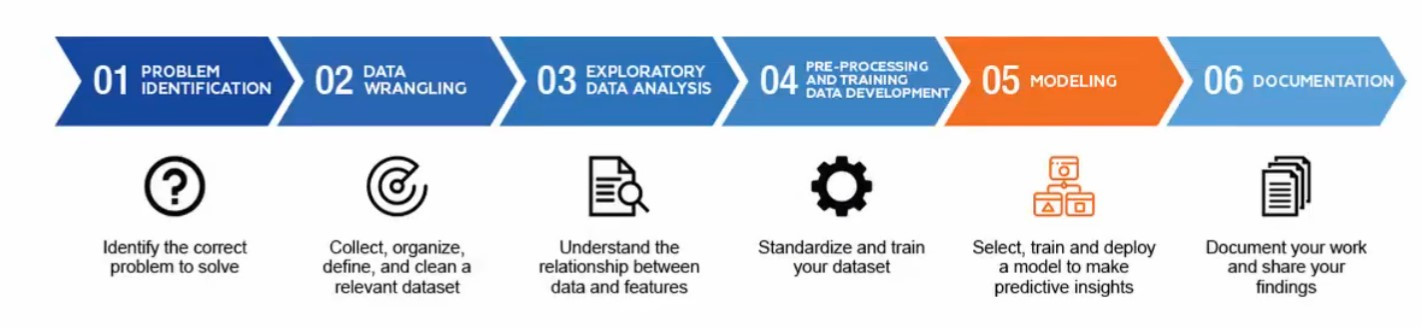

# Model Training --> Logistic Regression


In [14]:
model=LogisticRegression()

# train the Logistic Regression model with traning data

In [15]:
model.fit(X_train,Y_train)

LogisticRegression()

# model Evalution

In [16]:
# accuracy on training data

In [17]:
X_train_prediction=model.predict(X_train)

In [18]:
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [19]:
print("Acurracy on Training data : ",training_data_accuracy)

Acurracy on Training data :  0.8342245989304813


In [20]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [21]:
print("Acurracy on testing data : ",testing_data_accuracy)

Acurracy on testing data :  0.7619047619047619


# making a Predictive System

In [22]:
input_data=(0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,0.1640,0.1901,0.3026,0.2019,0.0592,0.2390,0.3657,0.3809,0.5929,0.6299,0.5801,0.4574,0.4449,0.3691,0.6446,0.8940,0.8978,0.4980,0.3333,0.2350,0.1553,0.3666,0.4340,0.3082,0.3024,0.4109,0.5501,0.4129,0.5499,0.5018,0.3132,0.2802,0.2351,0.2298,0.1155,0.0724,0.0621,0.0318,0.0450,0.0167,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062)


In [23]:
input_data_as_numpyarray=np.asanyarray(input_data)

In [24]:
# reshape the numpy array

In [25]:
input_data_reshape=input_data_as_numpyarray.reshape(1,-1)

In [26]:
prediction=model.predict(input_data_reshape)

In [27]:
if (prediction=="R"):
    print("The object is a Rock 🪨 ")
else:
    print("The object is a Mine 💣")

The object is a Rock 🪨 


In [28]:
con_matrix=metrics.confusion_matrix(X_test_prediction,Y_test)

In [29]:
con_matrix

array([[9, 3],
       [2, 7]], dtype=int64)

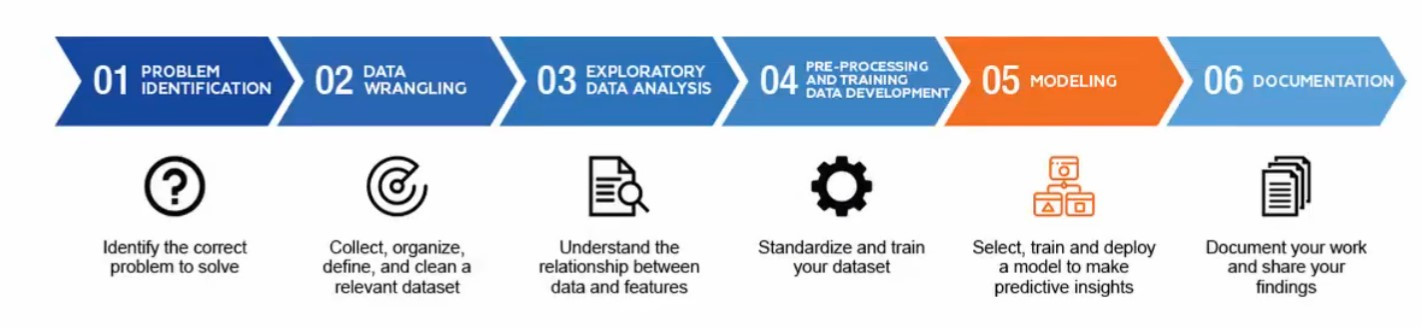

# Model Training --> KNN


In [30]:
test_accuracy_rate=[]
err_list=[]

In [31]:
for k in range(1,59):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,Y_train)
    y_pred=knn_model.predict(X_test)
    test_accuracy=accuracy_score(y_pred,Y_test)
    err_rate=1-test_accuracy
    test_accuracy_rate.append(test_accuracy)
    err_list.append(err_rate)

In [32]:
err_list.index(min(err_list))

0

In [33]:
confusion_matrix(Y_test,y_pred)

array([[7, 4],
       [4, 6]], dtype=int64)

In [34]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           M       0.64      0.64      0.64        11
           R       0.60      0.60      0.60        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.62      0.62      0.62        21



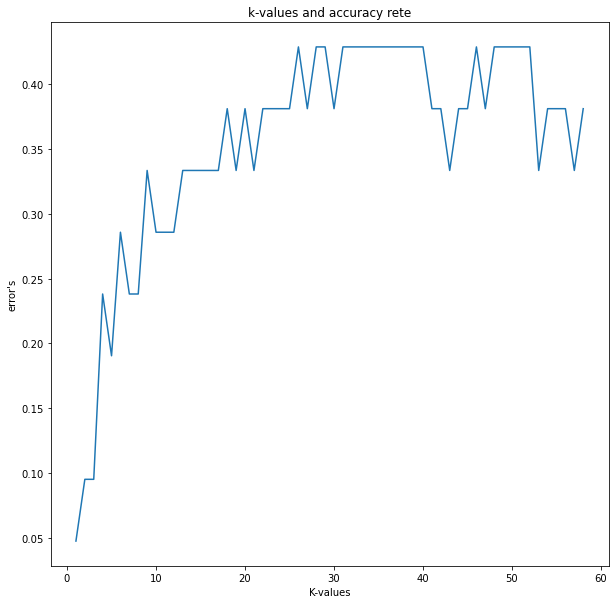

In [35]:
plt.figure(figsize=(10,10))
plt.plot(range(1,59),err_list)
plt.title("k-values and accuracy rete")
plt.xlabel("K-values")
plt.ylabel("error's")
plt.show()


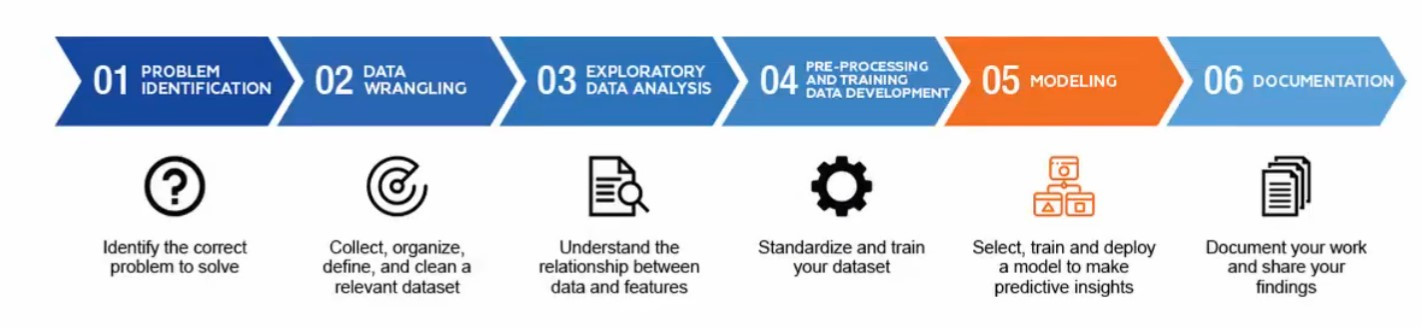

#  use the k=3 for the k-nearest  Neighbor classifier

In [36]:
knn_three=KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_three.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred_three=knn_three.predict(X_test)

In [39]:
confusion_matrix(Y_test,y_pred_three)

array([[11,  0],
       [ 2,  8]], dtype=int64)

In [40]:
print(classification_report(Y_test,y_pred_three))

              precision    recall  f1-score   support

           M       0.85      1.00      0.92        11
           R       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



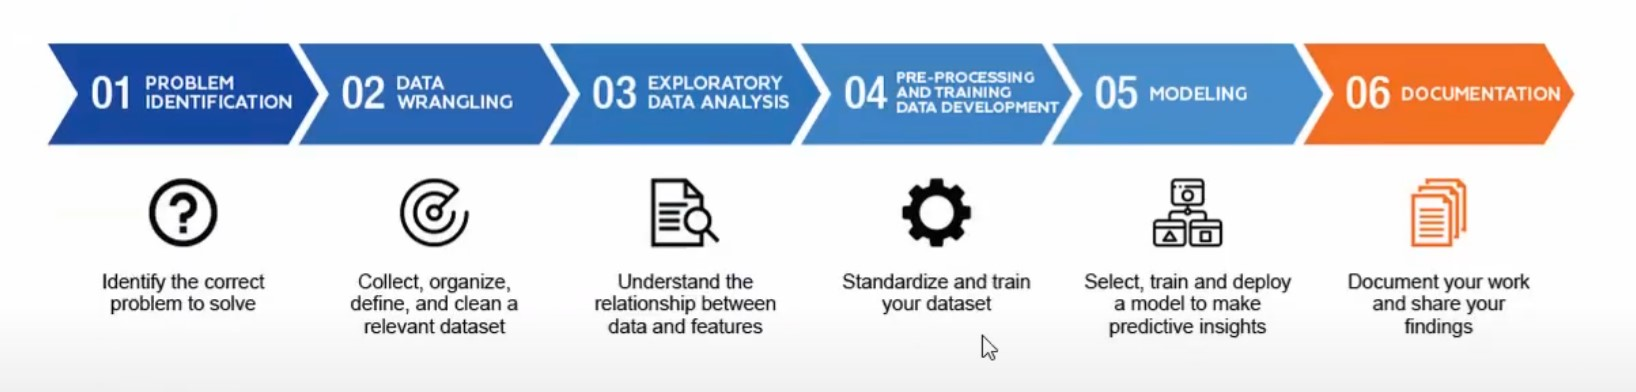

# Logistic Regression

In [41]:
print("Acurracy on Training data : ",training_data_accuracy)

Acurracy on Training data :  0.8342245989304813


In [42]:
print("Acurracy on testing data : ",testing_data_accuracy)

Acurracy on testing data :  0.7619047619047619


# KNN Model

In [43]:
test_accuracy_rate

[0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.7619047619047619,
 0.8095238095238095,
 0.7142857142857143,
 0.7619047619047619,
 0.7619047619047619,
 0.6666666666666666,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6190476190476191,
 0.6666666666666666,
 0.6190476190476191,
 0.6666666666666666,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.6190476190476191,
 0.5714285714285714,
 0.6190476190476191,
 0.5714285714285714,
 0.5714285714285714,
 0.6190476190476191,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.6190476190476191,
 0.6190476190476191,
 0.6666666666666666,
 0.6190476190476191,
 0.6190476190476191,
 0.5714285714285714,
 0.6190476190476191,
 0.5714285714

In [44]:
confusion_matrix(Y_test,y_pred)

array([[7, 4],
       [4, 6]], dtype=int64)

In [45]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           M       0.64      0.64      0.64        11
           R       0.60      0.60      0.60        10

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.62      0.62      0.62        21



#  Using the k=3 for the k-nearest  Neighbor classifier

In [46]:
confusion_matrix(Y_test,y_pred_three)

array([[11,  0],
       [ 2,  8]], dtype=int64)

In [47]:
print(classification_report(Y_test,y_pred_three))

              precision    recall  f1-score   support

           M       0.85      1.00      0.92        11
           R       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



# Conclusion :-

The Accuracy of Logistic Regression model is 77%



The Accuracy of for k-nearest  Neighbor classifier model is 90%







### We can conclude that KNN model giving better accuracy as compared to LogisticRegression.

### so we can take KNN model as our final Model to predict in Future.

# KB

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [49]:
gnb=GaussianNB()
mnb=MultinomialNB()

In [50]:
fit_gnb=gnb.fit(X_train,Y_train)

In [51]:
Y_pred_gnb=fit_gnb.predict(X_test)

In [52]:
Y_pred_gnb

array(['R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'R',
       'R', 'R', 'M', 'M', 'R', 'R', 'M', 'R'], dtype='<U1')

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [54]:
cnf_matrix_gnb=confusion_matrix(Y_test,Y_pred_gnb)
cnf_matrix_gnb

array([[6, 5],
       [3, 7]], dtype=int64)

In [55]:
print('accuracy: ',accuracy_score(Y_pred_gnb,Y_test)*100)

accuracy:  61.904761904761905


In [56]:
print(classification_report(Y_pred_gnb,Y_test))

              precision    recall  f1-score   support

           M       0.55      0.67      0.60         9
           R       0.70      0.58      0.64        12

    accuracy                           0.62        21
   macro avg       0.62      0.62      0.62        21
weighted avg       0.63      0.62      0.62        21

